In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
print('Tensorflow version :', tf.__version__)

Tensorflow version : 2.4.0


In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [14]:
print(len(x_train),'training examples')
print(len(x_test),'testing examples')



8982 training examples
2246 testing examples


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [4]:
num_classes = np.max(y_train) + 1
print(num_classes, 'classes')

46 classes


In [5]:
tokenizer = Tokenizer(num_words=10000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
x_train.shape, x_test.shape

((8982, 10000), (2246, 10000))

In [6]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test =  tf.keras.utils.to_categorical(y_test, num_classes)
y_train.shape, y_test.shape

((8982, 46), (2246, 46))

In [7]:
model = Sequential([
        Dense(512, input_shape=(10000,)),
        Activation('relu'),
        Dropout(0.5),
        Dense(num_classes),
        Activation('softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               5120512   
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 46)                23598     
_________________________________________________________________
activation_1 (Activation)    (None, 46)                0         
Total params: 5,144,110
Trainable params: 5,144,110
Non-trainable params: 0
_________________________________________________________________


In [8]:
from tensorflow.keras.callbacks import EarlyStopping
ES = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min')

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(x_train,y_train,epochs=100,batch_size=32,validation_split=0.1, callbacks=[ES])

Epoch 1/100
253/253 [==============================] - 10s 36ms/step - loss: 1.7593 - accuracy: 0.6243 - val_loss: 0.9503 - val_accuracy: 0.7942
Epoch 2/100
253/253 [==============================] - 9s 34ms/step - loss: 0.4924 - accuracy: 0.8871 - val_loss: 0.8294 - val_accuracy: 0.8131
Epoch 3/100
253/253 [==============================] - 9s 34ms/step - loss: 0.2715 - accuracy: 0.9429 - val_loss: 0.9135 - val_accuracy: 0.8065
Epoch 4/100
253/253 [==============================] - 9s 34ms/step - loss: 0.2008 - accuracy: 0.9559 - val_loss: 0.9134 - val_accuracy: 0.8165
Epoch 5/100
253/253 [==============================] - 9s 34ms/step - loss: 0.1741 - accuracy: 0.9556 - val_loss: 0.9508 - val_accuracy: 0.8065
Epoch 00005: early stopping


In [10]:
model.evaluate(x_test,y_test,batch_size=32, verbose=1)

71/71 [==============================] - 1s 11ms/step - loss: 0.9672 - accuracy: 0.7979


[0.9672175645828247, 0.7978628873825073]

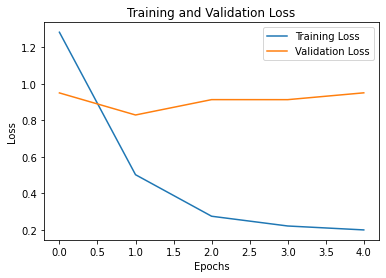

In [11]:
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

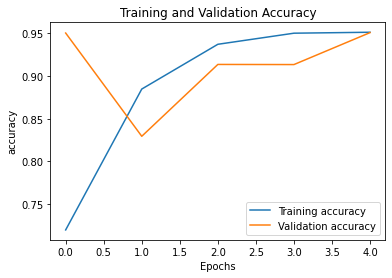

In [12]:
plt.plot(history.history['accuracy'], label="Training accuracy ")
plt.plot(history.history['val_loss'], label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()